In [1]:
# Packages
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import torch
import cv2
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 2. Given the function
$$f(x) = 100(x_2 - x_1^2) + (1 - x_1)^2$$

## 2a. Use the Matplotlib to generate a 3D plot of the function.

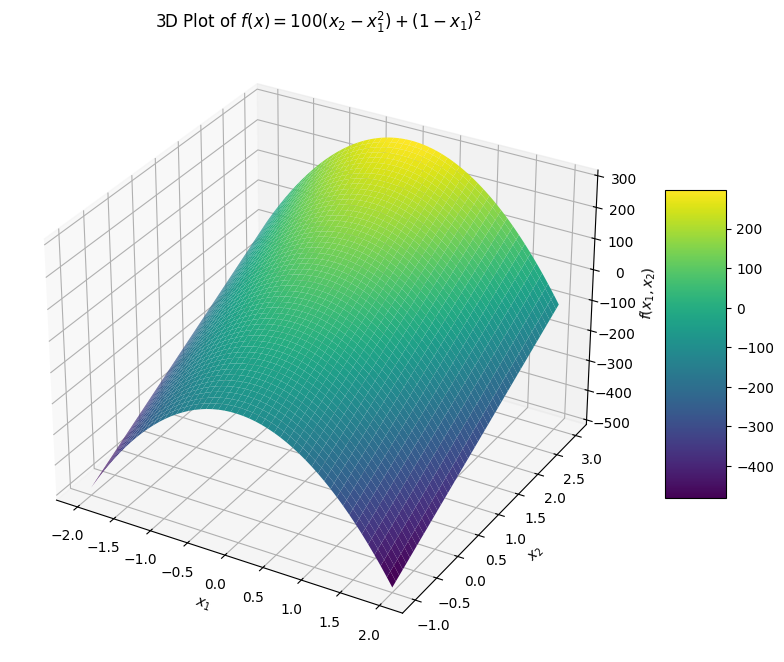

In [2]:
# Define the function
def f(x1, x2):
    return 100 * (x2 - x1**2) + (1 - x1)**2

# Create a grid of x1 and x2 values
x1 = np.linspace(-2, 2, 400)
x2 = np.linspace(-1, 3, 400)
X1, X2 = np.meshgrid(x1, x2)
Z = f(X1, X2)

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(X1, X2, Z, cmap='viridis', edgecolor='none')

# Add labels and title
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x_1, x_2)$')
ax.set_title('3D Plot of $f(x) = 100(x_2 - x_1^2) + (1 - x_1)^2$')

# Add a color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=5)

# Show the plot
plt.show()

## 2b. Generate a contour plot of $f$

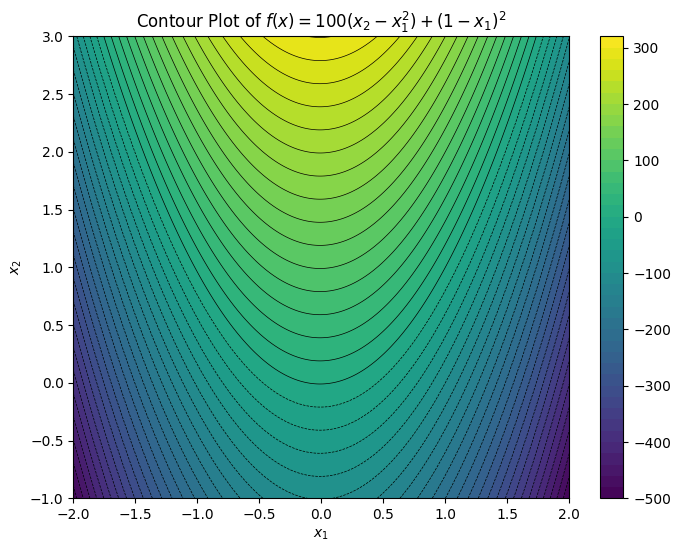

In [3]:
# Create a contour plot
fig, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(X1, X2, Z, levels=50, cmap='viridis')

# Add contour lines and colorbar
ax.contour(X1, X2, Z, levels=50, colors='black', linewidths=0.5)
plt.colorbar(contour)

# Labels and title
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Contour Plot of $f(x) = 100(x_2 - x_1^2) + (1 - x_1)^2$')

plt.show()

## 2c. Determine the gradient of $f(x)$ using Autograd under PyTorch

In [4]:
def f(x):
    """
    The Rosenbrock function.
    x is a tensor with two elements: [x1, x2]
    """
    x1 = x[0]
    x2 = x[1]
    return 100 * (x2 - x1**2) + (1 - x1)**2

# Create a PyTorch tensor for the input variables.
x = torch.tensor([0.0, 0.0], requires_grad=True)

# Calculate the function value
output = f(x)

# Calculate the gradient
output.backward()

# Print the gradient
print(x.grad)

tensor([ -2., 100.])


## 2d. Determine the gradient at the point $x = \begin{bmatrix} 1 \\ 1 \end{bmatrix}$.

In [5]:
x = torch.tensor([1.0, 1.0], requires_grad=True)

# Compute function value
y = f(x)

# Compute gradients
y.backward()

# Print the gradient at x = [1, 1]
print("Gradient of f at x =", x.detach().numpy(), "is", x.grad.numpy())

Gradient of f at x = [1. 1.] is [-200.  100.]


# 3.  Timbuktu.

In [6]:
# Load the image
image = cv2.imread('/content/drive/MyDrive/Timbuktu.jpg')

## Convert the colored image into a gray-level image

In [7]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

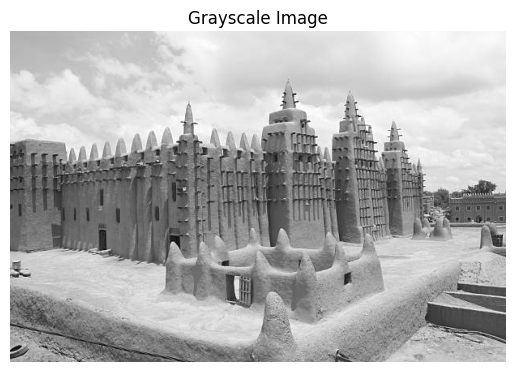

In [8]:
# Display the grayscale image
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')  # Hide axes
plt.show()

## Read the grey-level values into a matrix

In [9]:
# Convert the grayscale image to a matrix
gray_matrix = np.array(gray_image)
print("Shape of the grayscale matrix:", gray_matrix.shape)

Shape of the grayscale matrix: (408, 612)


## Determine the SVD of the matrix

In [10]:
# Perform SVD on the grayscale matrix
U, S, Vt = np.linalg.svd(gray_matrix, full_matrices=False)

print("Shape of U:", U.shape)
print("Shape of S:", S.shape)
print("Shape of Vt:", Vt.shape)


Shape of U: (408, 408)
Shape of S: (408,)
Shape of Vt: (408, 612)


In [11]:
# Compress the Image
def compress_image(U, S, Vt, k):
    """
    Compress the image using the top k singular values.
    """
    # Keep only the top k singular values
    Uk = U[:, :k]  # First k columns of U
    Sk = np.diag(S[:k])  # Diagonal matrix of the top k singular values
    Vtk = Vt[:k, :]  # First k rows of Vt

    # Reconstruct the compressed image
    compressed_image = np.dot(Uk, np.dot(Sk, Vtk))
    return compressed_image

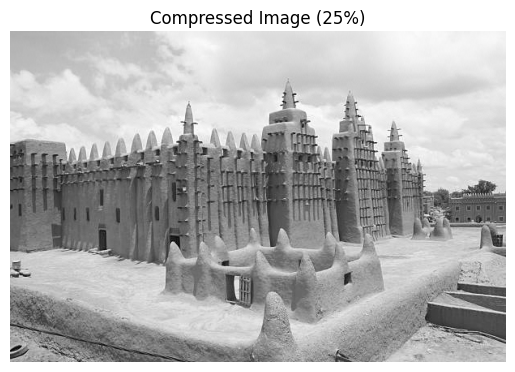

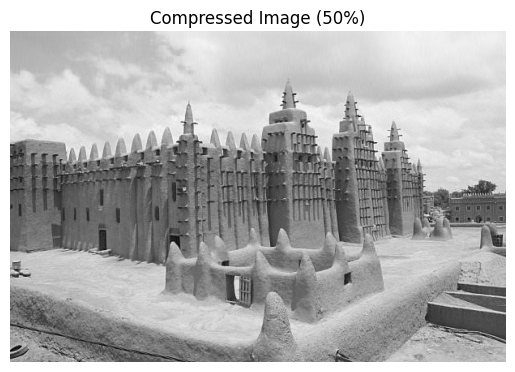

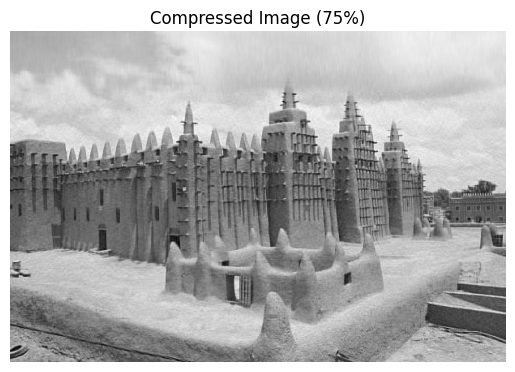

In [32]:
# Compress the Image by 25%, 50%, and 75%
# Define compression ratios
ratios = [0.25, 0.50, 0.75]

# Store compressed images
compressed_images = []

# Loop through each compression ratio
for ratio in ratios:
    # Calculate the number of singular values to keep
    k = int(min(gray_matrix.shape) * (1-ratio))

    # Compress the image
    compressed_image = compress_image(U, S, Vt, k)

    # Store the compressed image
    compressed_images.append(compressed_image)

    # Display the compressed image
    plt.imshow(compressed_image, cmap='gray')
    plt.title(f"Compressed Image ({int(ratio * 100)}%)")
    plt.axis('off')
    plt.show()


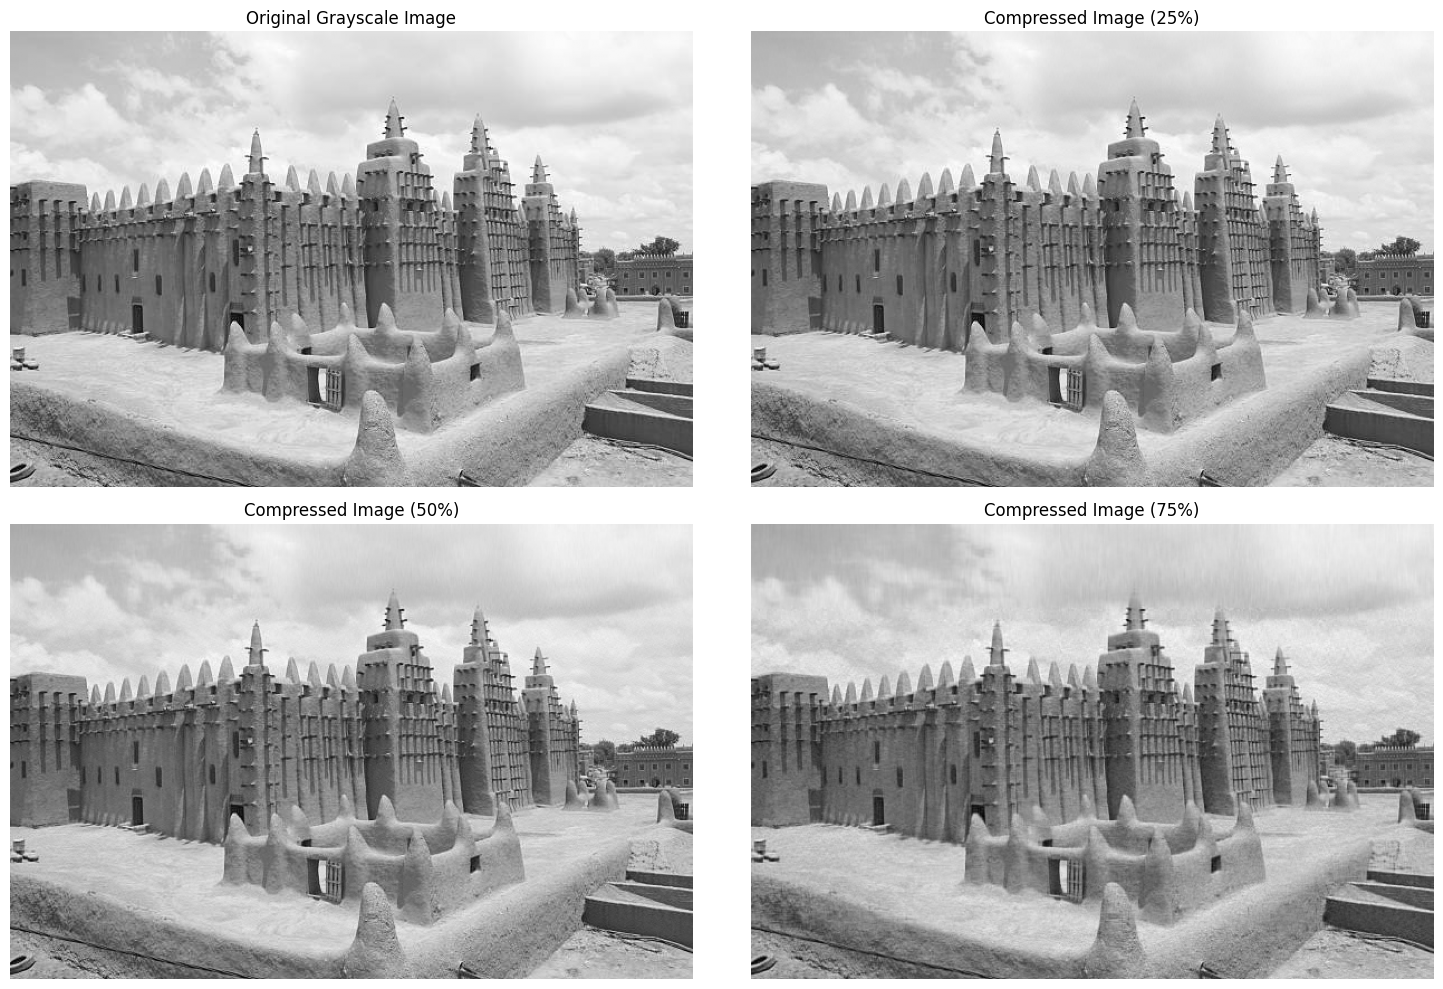

In [13]:
# Create a figure to display all images
plt.figure(figsize=(15, 10))

# Original grayscale image
plt.subplot(2, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')

# Compressed images
for i, ratio in enumerate(ratios):
    plt.subplot(2, 2, i + 2)# Drop the last column
    plt.imshow(compressed_images[i], cmap='gray')
    plt.title(f"Compressed Image ({int(ratio * 100)}%)")
    plt.axis('off')

# Show the plot
plt.tight_layout()
plt.show()

## Compare the results you obtained each time by reconstructing the resulting image

### 1. Image Quality Degradation  
I compared the images at **75%**, **50%**, and **25%** compression levels and couldn’t see any noticeable difference between them. The compression effectively reduced the image size while preserving visual quality, which is the main goal of image compression.  

Out of curiosity, I also tested compression levels of **85% and above** and noticed some loss in image quality. At these higher compression levels, details became less sharp, and slight blurring or pixelation appeared in certain areas. This suggests that while moderate compression maintains quality, excessive compression can lead to visible degradation.


# 4. Perform the principal-component analysis of the dataset, vehicle.csv

## Load the dataset

In [14]:
file_path = '/content/drive/MyDrive/vehicle.csv'
data = pd.read_csv(file_path)

In [15]:
data.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [16]:
# Drop the last column
data_features = data.drop(columns=['class'])
data_features.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183


In [17]:
# Replace missing values with the mean of the respective column
data_clean = data_features.fillna(data_features.mean())

# To verify that there are no null values left
print(data_clean.isnull().sum())

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
dtype: int64


In [18]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_clean)

In [19]:
from sklearn.decomposition import PCA

# Initialize PCA
pca = PCA()

# Fit PCA on the standardized data
pca.fit(data_standardized)

# Transform the data to its principal components
principal_components = pca.transform(data_standardized)
principal_components

array([[ 3.32393198e-01,  2.18638382e-01,  1.00128619e+00, ...,
        -1.72969434e-01,  1.26816729e-02,  3.31573303e-02],
       [-1.59374091e+00,  4.20549398e-01, -3.69264301e-01, ...,
        -2.11162677e-02, -2.61733970e-02, -1.30111707e-02],
       [ 3.76753509e+00, -1.95040767e-01,  8.82372311e-02, ...,
         9.25199412e-02, -1.59318614e-01,  1.75613438e-02],
       ...,
       [ 4.80780979e+00,  1.82373823e-03,  5.32772800e-01, ...,
         1.27912812e-02,  2.87114858e-02,  1.26736645e-03],
       [-3.29572788e+00,  1.00880341e+00, -3.57467658e-01, ...,
         1.32632608e-01, -7.02042747e-02, -4.62020753e-03],
       [-4.76673461e+00, -3.34686477e-01, -5.68739264e-01, ...,
         1.29284369e-01, -1.07969966e-01, -2.29390407e-02]])

In [20]:
# Create a DataFrame for the principal components
principal_df = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(pca.n_components_)])

# Display the first few rows of the principal components
print(principal_df.head())

        PC1       PC2        PC3       PC4       PC5       PC6       PC7  \
0  0.332393  0.218638   1.001286 -0.177328  0.079106  0.754814 -0.902187   
1 -1.593741  0.420549  -0.369264 -0.233484  0.693397  0.519073  0.376234   
2  3.767535 -0.195041   0.088237 -1.203129  0.730907 -0.705377 -0.032642   
3 -1.740753  2.829579   0.109176 -0.377522 -0.363483  0.487863  0.468613   
4  0.555239 -4.757557  11.703588 -0.145068  3.257651  0.211649  2.671191   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  0.383358 -0.868964 -0.088599  0.023302 -0.013586 -0.120285 -0.279619   
1 -0.247624  0.146542  0.096104  0.492591  0.272920 -0.041611 -0.076748   
2 -0.483439 -0.308888  0.469880  0.259449  0.144857 -0.055514 -0.065500   
3  0.022129 -0.029270 -0.458229  0.375358 -0.003531  0.214617 -0.171059   
4  0.446380  2.090488  0.348406  0.169747  0.108169 -0.174138 -0.179879   

       PC15      PC16      PC17      PC18  
0 -0.082246 -0.172969  0.012682  0.033157  
1 -0

## What are the principal components?

In [21]:
# Get the principal component loadings
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=data_features.columns)
print(loadings)

                                  PC1       PC2       PC3       PC4       PC5  \
compactness                  0.275259  0.127011 -0.119874 -0.078311  0.069306   
circularity                  0.293392 -0.126217 -0.025184 -0.187526 -0.085019   
distance_circularity         0.304556  0.072686 -0.056006  0.070796  0.040724   
radius_ratio                 0.267593  0.189635  0.275066  0.042257 -0.046016   
pr.axis_aspect_ratio         0.080494  0.122159  0.642046 -0.032858 -0.040594   
max.length_aspect_ratio      0.097220 -0.010728  0.591800 -0.031320  0.213612   
scatter_ratio                0.316872 -0.048047 -0.097653  0.095981 -0.014997   
elongatedness               -0.314042 -0.012799  0.057465 -0.082738  0.076801   
pr.axis_rectangularity       0.313953 -0.060035 -0.109509  0.092271  0.001500   
max.length_rectangularity    0.282790 -0.116183 -0.016999 -0.187988 -0.060545   
scaled_variance              0.309311 -0.061754  0.056466  0.120374 -0.000465   
scaled_variance.1           

In [27]:
# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Determine the number of components that captures 95% of variance
cumulative_variance = np.cumsum(explained_variance_ratio)
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"\nNumber of principal components needed to retain 95% variance is : {n_components}")


Number of principal components needed to retain 95% variance is : 7


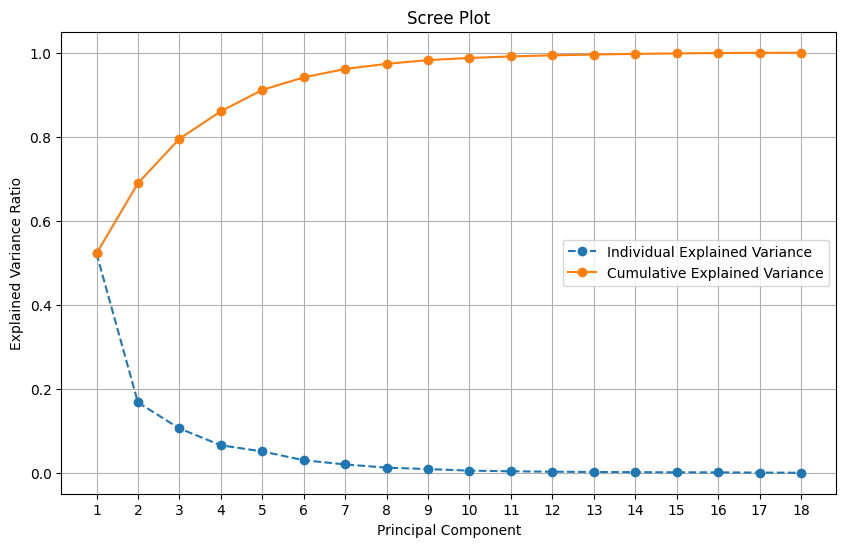

In [26]:
# Explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Create the scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--', label='Individual Explained Variance')
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-', label='Cumulative Explained Variance')

# Add labels and title
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.legend()
plt.grid(True)
plt.show()